–ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–∑ –¥—Ä—É–≥–∏—Ö —Ä–∞–±–æ—Ç:

| Paper | ACC | AUC | Gini |
| --- | --- | --- | --- | 
| Bequ√© & Lessmann, 2017 | 0.695 | 0.649 | 0.2980 | 
| Engelmann & Lessmann, 2021 | - | 0.6528 | 0.3056 | 


In [22]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [23]:
# params
seed = 42

In [24]:
#read the data
df = pd.read_csv('Loan Data.csv',
                 header = [0], sep = ';')

df.head()

YOB  NKID  DEP  PHON  SINC AES    DAINC RES    DHVAL   DMORT  DOUTM  \
0  19.0   4.0  0.0     1   0.0   R      0.0   O  14464.0     4.0    0.0   
1  41.0   2.0  0.0     1   0.0   P  36000.0   O      0.0     0.0  280.0   
2  66.0   0.0  0.0     1   0.0   N  30000.0   N      0.0     0.0    0.0   
3  51.0   2.0  0.0     1   0.0   P    464.0   O  24928.0  8464.0  584.0   
4  65.0   0.0  0.0     1   0.0   P  15000.0   P      0.0     0.0    0.0   

   DOUTL  DOUTHP  DOUTCC  BAD  
0    0.0     0.0     0.0  0.0  
1  664.0     0.0    80.0  0.0  
2    0.0     0.0     0.0  0.0  
3  320.0     0.0    60.0  0.0  
4    0.0     0.0     0.0  0.0

In [4]:
#get description of factors as tabulated markdown
df_names = pd.read_excel('Loan Data Dictionary.xls', header = [2])
df_names = df_names.fillna("")
#print(df_names.to_markdown())

### –°–ø–∏—Å–æ–∫ —Ñ–∞–∫—Ç–æ—Ä–æ–≤:


|    | Variable Name                                                                               | Description                   | Codings                        |
|---:|:--------------------------------------------------------------------------------------------|:------------------------------|:-------------------------------|
|  0 |                                                                                             |                               |                                |
|  1 | yob                                                                                         | Year of birth                 | If unknown the year will be 99 |
|  2 | nkid                                                                                        | Number of children            | number                         |
|  3 | dep                                                                                         | Number of other dependents    | number                         |
|  4 | phon                                                                                        | Is there a home phone         | 1=yes, 0 = no                  |
|  5 | sinc                                                                                        | Spouse's income               |                                |
|  6 | aes                                                                                         | Applicant's employment status | V = Government                 |
|  7 |                                                                                             |                               | W = housewife                  |
|  8 |                                                                                             |                               | M = military                   |
|  9 |                                                                                             |                               | P = private sector             |
| 10 |                                                                                             |                               | B = public sector              |
| 11 |                                                                                             |                               | R = retired                    |
| 12 |                                                                                             |                               | E = self employed              |
| 13 |                                                                                             |                               | T = student                    |
| 14 |                                                                                             |                               | U = unemployed                 |
| 15 |                                                                                             |                               | N = others                     |
| 16 |                                                                                             |                               | Z  = no response               |
| 17 |                                                                                             |                               |                                |
| 18 |                                                                                             |                               |                                |
| 19 | dainc                                                                                       | Applicant's income            |                                |
| 20 | res                                                                                         | Residential status            | O = Owner                      |
| 21 |                                                                                             |                               | F = tenant furnished           |
| 22 |                                                                                             |                               | U = Tenant Unfurnished         |
| 23 |                                                                                             |                               | P = With parents               |
| 24 |                                                                                             |                               | N = Other                      |
| 25 |                                                                                             |                               | Z = No response                |
| 26 | dhval                                                                                       | Value of Home                 | 0 = no response or not owner   |
| 27 |                                                                                             |                               | 000001 = zero value            |
| 28 |                                                                                             |                               | blank = no response            |
| 29 | dmort                                                                                       | Mortgage balance outstanding  | 0 = no response or not owner   |
| 30 |                                                                                             |                               | 000001 = zero balance          |
| 31 |                                                                                             |                               | blank = no response            |
| 32 | doutm                                                                                       | Outgoings on mortgage or rent |                                |
| 33 | doutl                                                                                       | Outgoings on Loans            |                                |
| 34 | douthp                                                                                      | Outgoings on Hire Purchase    |                                |
| 35 | doutcc                                                                                      | Outgoings on credit cards     |                                |
| 36 | Bad                                                                                         | Good/bad indicator            | 1 = Bad                        |
| 37 |                                                                                             |                               | 0 = Good                       |


–î–ª—è –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–∏—è –Ω–æ—Ç–∞—Ü–∏–∏, –ø–µ—Ä–µ–∏–º–µ–Ω—É–µ–º –∑–∞–≤–∏—Å–∏–º—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É –∏–∑ Bad –≤ target

In [5]:
df.rename(columns = {"BAD":"target"}, inplace = True)

–í—ã–¥–µ–ª—è–µ–º test&train —Å–µ—Ç—ã

In [6]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)


–°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ

In [ ]:
!pip install pyarrow
!pip install fastparquet

In [7]:
# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet('./samples/X_train.parquet')
X_test.to_parquet('./samples/X_test.parquet')
# –ø–µ—Ä–µ–≤–æ–¥–∏–º pd.Series –≤ pd.DataFrame –¥–ª—è —É–¥–æ–±–Ω–æ–≥–æ —ç–∫—Å–ø–æ—Ä—Ç–∞
pd.DataFrame(y_train).to_parquet('./samples/y_train.parquet')
pd.DataFrame(y_test).to_parquet('./samples/y_test.parquet')

#—Å–ø–∏—Å–∫–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
df_number_of_uniques = df.nunique()
presumably_continuous = df_number_of_uniques[df_number_of_uniques >= 15]
presumably_discrete = df_number_of_uniques[df_number_of_uniques < 15]

presumably_continuous_names = list(presumably_continuous.index)
presumably_discrete_names = list(presumably_discrete.index)

with open('factors.json', 'w') as f:
    json.dump({'cat_vals': presumably_discrete_names, "num_vals": presumably_continuous_names}, f)

### –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

In [8]:
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π: {X.shape[0]}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤: {X.shape[1]}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–µ–ª–µ–≤—ã—Ö —Å–æ–±—ã—Ç–∏–π: {y.sum()}')
print(f'–î–æ–ª—è —Ü–µ–ª–µ–≤—ã—Ö —Å–æ–±—ã—Ç–∏–π: {y.sum() / X.shape[0] * 100}%')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π: 1225
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤: 14
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–µ–ª–µ–≤—ã—Ö —Å–æ–±—ã—Ç–∏–π: 323.0
–î–æ–ª—è —Ü–µ–ª–µ–≤—ã—Ö —Å–æ–±—ã—Ç–∏–π: 26.36734693877551%


### –ü—Ä–æ–ø—É—Å–∫–∏

–ù–µ–∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç:

In [9]:
for col in X.columns:
    print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É {col}:\n\t{X[col].isna().sum()} –∏–ª–∏ {X[col].isna().sum() / df.shape[0] * 100}%')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É YOB:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É NKID:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É DEP:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É PHON:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É SINC:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É AES:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É DAINC:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É RES:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É DHVAL:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É DMORT:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É DOUTM:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É DOUTL:
	0 –∏–ª–∏ 0.0%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ

–û–¥–Ω–∞–∫–æ —Å–æ–≥–ª–∞—Å–Ω–æ –æ–ø–∏—Å–∞–Ω–∏—é –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∏–∑ –Ω–∏—Ö –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏. –î–æ–ª—è —ç—Ç–∏—Ö —á–∏—Å–µ–ª:

In [10]:
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É YOB:\n\t{(X["YOB"] == 99).sum()} –∏–ª–∏ {(X["YOB"] == 99).sum() / df.shape[0] * 100}%')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (no response) –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É AES:\n\t{(X["AES"] == "Z").sum()} –∏–ª–∏ {(X["AES"] == "Z").sum() / df.shape[0] * 100}%')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (no response) –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É RES:\n\t{(X["RES"] == "Z").sum()} –∏–ª–∏ {(X["RES"] == "Z").sum() / df.shape[0] * 100}%')


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É YOB:
	7 –∏–ª–∏ 0.5714285714285714%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (no response) –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É AES:
	8 –∏–ª–∏ 0.653061224489796%
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (no response) –ø–æ —Ñ–∞–∫—Ç–æ—Ä—É RES:
	0 –∏–ª–∏ 0.0%


–ù—É–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –¥–ª—è —Ñ–∞–∫—Ç–æ—Ä–æ–≤ AES –∏ RES –∑–Ω–∞—á–µ–Ω–∏–µ no response –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–æ–º –≤ —á–∏—Å—Ç–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–º —Å–º—ã—Å–ª–µ - –¥–∞–Ω–Ω—ã–µ –µ—Å—Ç—å, –ø—Ä–æ—Å—Ç–æ –æ–Ω–∏ —Å–æ–æ–±—â–∞—é—Ç, —á—Ç–æ —Ä–µ—Å–ø–æ–Ω–¥–µ–Ω—Ç –æ—Ç–∫–∞–∑–∞–ª—Å—è –æ—Ç–≤–µ—á–∞—Ç—åcat_vals_mask

### –í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–ò–∑–≥–æ—Ç–æ–≤–∏–º –º–∞—Å–∫—É –¥–ª—è –æ—Å–º—ã—Å–ª–µ–Ω–Ω–æ–≥–æ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è —Ñ–∞–∫—Ç–æ—Ä–æ–≤:

In [11]:
from pprint import pprint 
df_names_short = df_names[["Variable Name", "Description"]][(df_names["Variable Name"] != "")&(df_names["Description"] != "")]
short_names = df_names_short["Variable Name"]
short_names = short_names.str.upper()
meaningful_names = df_names_short["Description"]
names_mask = dict(zip(short_names, meaningful_names))

pprint(names_mask)

{'AES': "Applicant's employment status",
 'BAD': 'Good/bad indicator',
 'DAINC': "Applicant's income",
 'DEP': 'Number of other dependents',
 'DHVAL': 'Value of Home',
 'DMORT': 'Mortgage balance outstanding',
 'DOUTCC': 'Outgoings on credit cards',
 'DOUTHP': 'Outgoings on Hire Purchase',
 'DOUTL': 'Outgoings on Loans',
 'DOUTM': 'Outgoings on mortgage or rent',
 'NKID': 'Number of children',
 'PHON': 'Is there a home phone',
 'RES': 'Residential status',
 'SINC': "Spouse's income",
 'YOB': 'Year of birth'}


–ò –º–∞—Å–∫–∏ –¥–ª—è –æ—Å–º—ã—Å–ª–µ–Ω–Ω—ã—Ö –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–π –∫–æ–¥–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (—Ç–∞–∫ –∫–∞–∫ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ –∫–æ–¥ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç —Ä–∞–∑–Ω—ã–µ –≤–µ—â–∏, —ç—Ç–æ –±—É–¥—É—Ç —Ä–∞–∑–Ω—ã–µ —Å–ø–∏—Å–∫–∏):

In [12]:

cat_vals_phon_mask = {
    1 : "yes",
    0 : "no"
}
cat_vals_aes_mask = {
    "V" : "Government",
    "W" : "housewife",
    "M" : "military", 
    "P" : "private sector",
    "B" : "public sector",
    "R" : "retired",
    "E" : "self employed",
    "T" : "student",
    "U" : "unemployed",
    "N" : "others",
    "Z" : "no response"
}
cat_vals_res_mask = {
    "O" : "Owner", 
    "F" : "tenant furnished", 
    "U" : "Tenant Unfurnished", 
    "P" : "With parents", 
    "N" : "Other", 
    "Z" : "no response"
}

cat_vals_dhval_mask = {
    0 : "no response or not owner", 
    "" : "no response", 
    "000001" : "zero value"
}

cat_vals_dmort_mask = {
    0 : "no response or not owner", 
    "" : "no response", 
    "000001" : "zero value"
}

dict_of_masks = {
    "PHON" : cat_vals_phon_mask,
    "AES" : cat_vals_aes_mask,
    "RES" : cat_vals_res_mask,
    "DHVAL" : cat_vals_dhval_mask,
    "DMORT" : cat_vals_dmort_mask,
}

In [13]:
X_cat = X.replace(cat_vals_phon_mask)

In [14]:
for col_name in dict_of_masks.keys():
    X_cat[col_name] = X_cat[col_name].replace(dict_of_masks[col_name])

In [15]:
X_cat.head()

YOB NKID DEP PHON SINC             AES    DAINC           RES    DHVAL  \
0  19.0  4.0  no  yes   no         retired       no         Owner  14464.0   
1  41.0  2.0  no  yes   no  private sector  36000.0         Owner       no   
2  66.0   no  no  yes   no          others  30000.0         Other       no   
3  51.0  2.0  no  yes   no  private sector    464.0         Owner  24928.0   
4  65.0   no  no  yes   no  private sector  15000.0  With parents       no   

    DMORT  DOUTM  DOUTL DOUTHP DOUTCC  
0     4.0     no     no     no     no  
1      no  280.0  664.0     no   80.0  
2      no     no     no     no     no  
3  8464.0  584.0  320.0     no   60.0  
4      no     no     no     no     no

–ü—Ä–æ–≤–µ—Ä–∏–º, –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å –ª–∏ –Ω—É–ª–µ–π –∏–ª–∏ –µ–¥–∏–Ω–∏—Ü –∏–∑-–∑–∞ –ø—É—Ç–∞–Ω–∏—Ü—ã –≤ —Ç–∏–ø–∞—Ö –¥–∞–Ω–Ω—ã—Ö (–≤—Å–µ –æ–∫):

In [16]:
print(X_cat["PHON"][X_cat["PHON"] == "0"])
print(X_cat["PHON"][X_cat["PHON"] == "1"])
print(X_cat["DHVAL"][X_cat["DHVAL"] == "0"])
print(X_cat["DHVAL"][X_cat["DHVAL"] == 0])
print(X_cat["DMORT"][X_cat["DMORT"] == "0"])

Series([], Name: PHON, dtype: object)
Series([], Name: PHON, dtype: object)
Series([], Name: DHVAL, dtype: object)
Series([], Name: DHVAL, dtype: object)
Series([], Name: DMORT, dtype: object)


In [17]:
X_cat = X_cat[X_cat["YOB"] != 99]

numeric


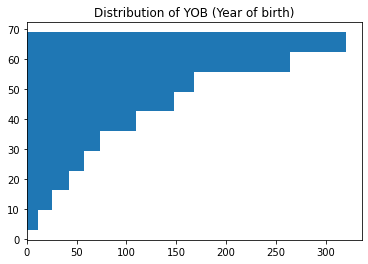

mixed
This is a column mixed of both numeric and non-numeric values


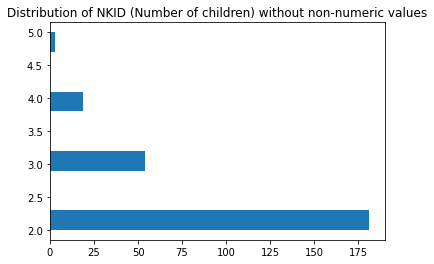

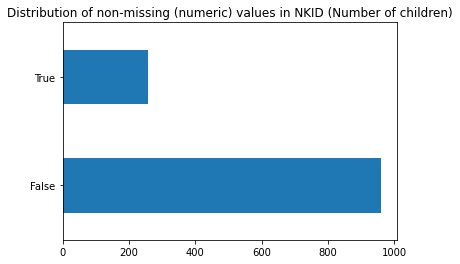

mixed
This is a column mixed of both numeric and non-numeric values


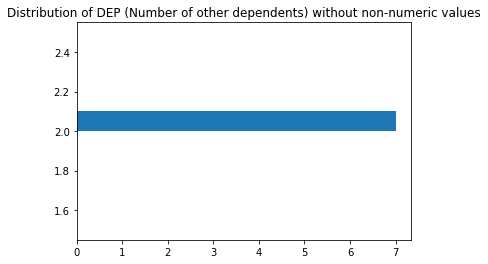

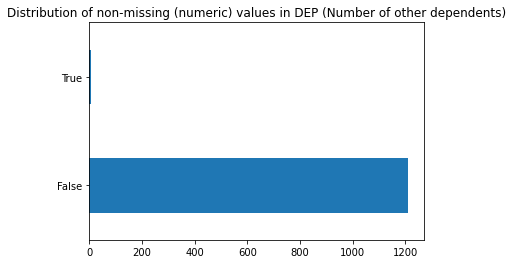

categorical


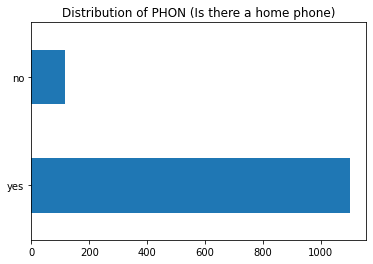

mixed
This is a column mixed of both numeric and non-numeric values


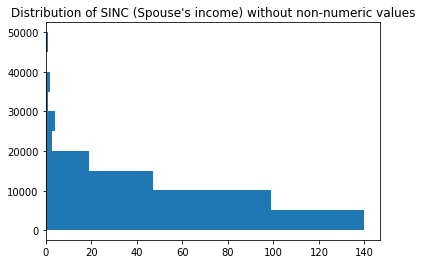

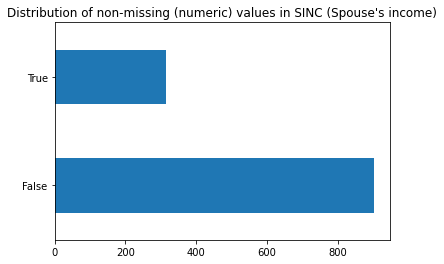

categorical


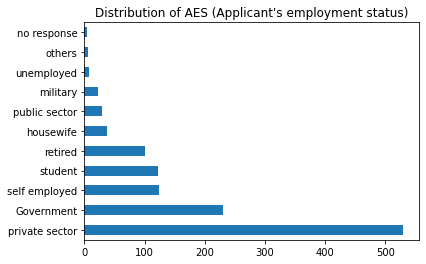

mixed
This is a column mixed of both numeric and non-numeric values


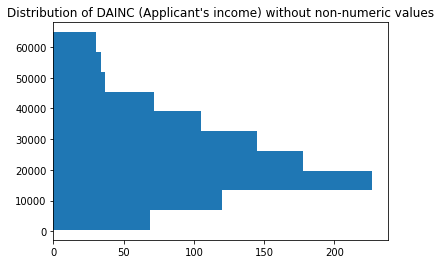

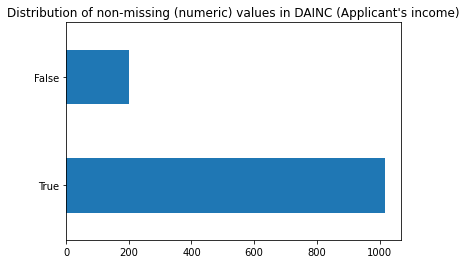

categorical


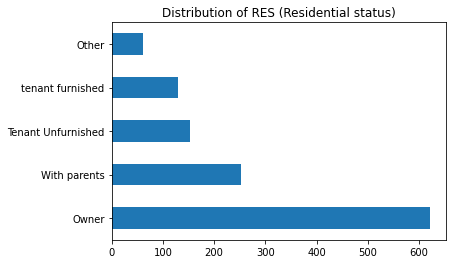

mixed
This is a column mixed of both numeric and non-numeric values


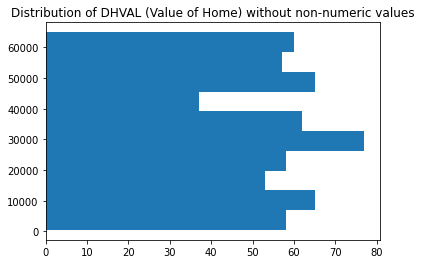

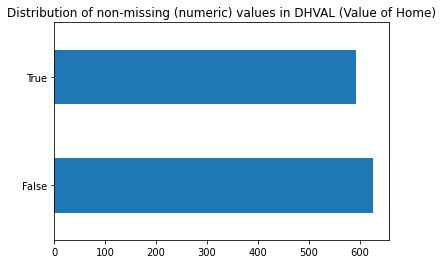

mixed
This is a column mixed of both numeric and non-numeric values


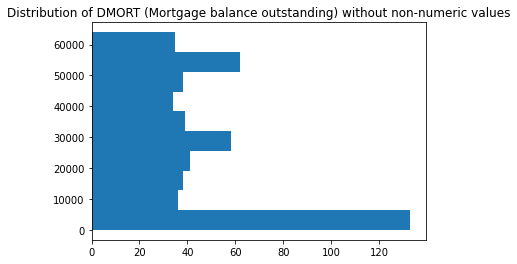

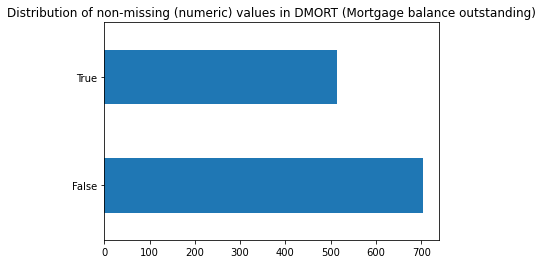

mixed
This is a column mixed of both numeric and non-numeric values


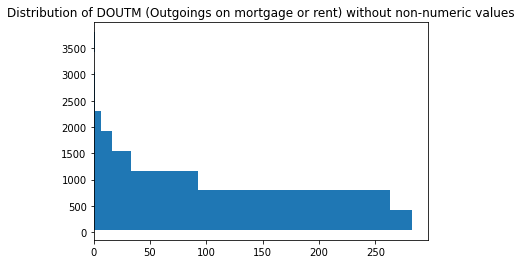

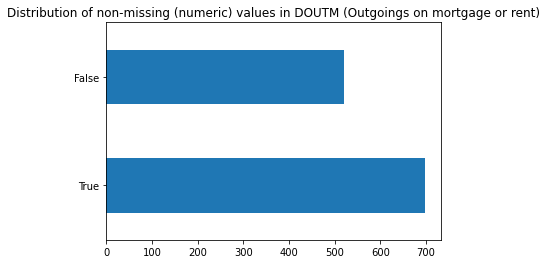

mixed
This is a column mixed of both numeric and non-numeric values


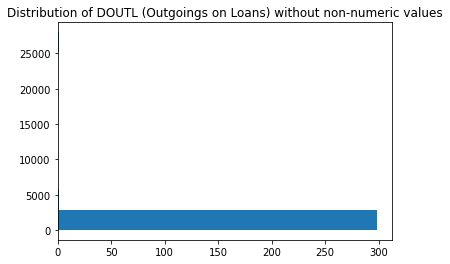

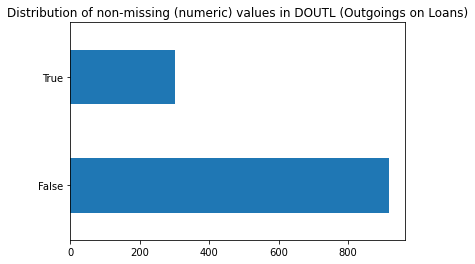

mixed
This is a column mixed of both numeric and non-numeric values


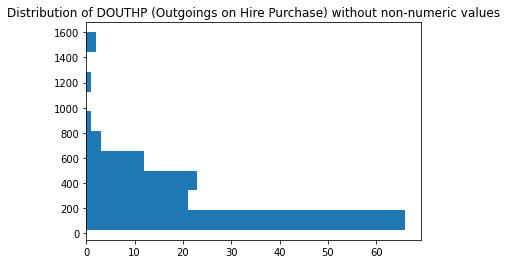

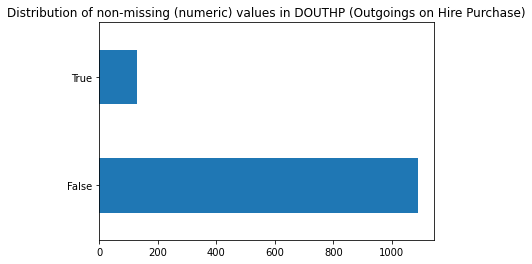

mixed
This is a column mixed of both numeric and non-numeric values


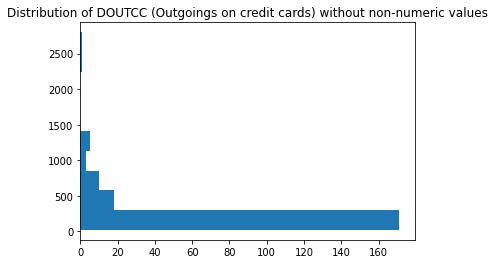

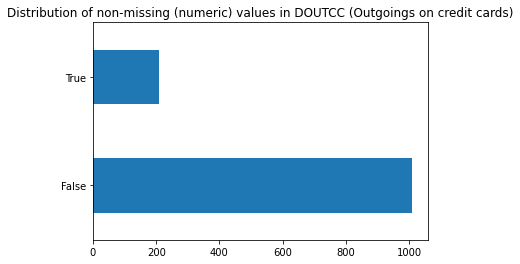

In [18]:
def plot_categorical(column, column_name, names_mask):
    column.value_counts().plot.barh()
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]})')
    plt.show()

def plot_mixed(column, column_name, names_mask):
    print("This is a column mixed of both numeric and non-numeric values")
    check_numeric = column.str.isnumeric()
    check_numeric[check_numeric.isnull()] = True
    check_numeric[column.isnull()] = False

    plt.hist(column[check_numeric], orientation='horizontal')
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]}) without non-numeric values')
    plt.show()

    check_numeric.value_counts().plot.barh()
    plt.title(f'Distribution of non-missing (numeric) values in {column_name} ({names_mask[column_name]})')
    plt.show()

def plot_numeric(column, column_name, names_mask):
    plt.hist(column, orientation='horizontal')
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]})')
    plt.show()    

def plot_datetime(column, column_name, names_mask):
    column.hist()
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]})')
    plt.show()
    
def check_mixed_or_categorical(column):
    if is_string_dtype(column) == False:
        return(False)
    else:
        check_numeric = column.str.isnumeric()
        check_numeric[check_numeric.isnull()] = True
        check_numeric[column.isnull()] = False
        if len(column[check_numeric]) == 0:
            return("categorical")
        else:
            return("mixed")

def check_factor_plotting_type(column, column_name, names_mask):
    if column.dtype == pd.Series([np.datetime64("1995-05-05")]).dtype:
        return("datetime")
    elif check_mixed_or_categorical(column) != False:
        return(check_mixed_or_categorical(column))
    else:
        return("numeric")

def plot_all(column, column_name, names_mask):
    map_functions_to_types = {
        "categorical" : plot_categorical,
        "mixed" : plot_mixed,
        "numeric" : plot_numeric, 
        "datetime" : plot_datetime
    }
    
    type_checked = check_factor_plotting_type(column, column_name, names_mask)
    print(type_checked)
    map_functions_to_types[type_checked](column, column_name, names_mask)


for col in X_cat.columns:
    
    plot_all(X_cat[col], col, names_mask)

–í –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å, —Å–º—É—â–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–æ–¥–æ–≤ —Ä–æ–∂–¥–µ–Ω–∏—è (—Å–∞–º—ã–π –ø–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫). –ó–∞—è–≤–∫–∏ –æ—Ç –≥—Ä–∞–∂–¥–∞–Ω, —Ä–æ–¥–∏–≤—à–∏—Ö—Å—è –≤ 00-10—Ö –≥–≥.? –ù–∞ –º–æ–º–µ–Ω—Ç –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –∫–Ω–∏–≥–∏ (2002) –∏–º –±—ã–ª–æ –ø–æ 90-100 –ª–µ—Ç. –î–æ–ø—É—Å—Ç–∏–º, –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–±–∏—Ä–∞–ª—Å—è –Ω–µ –æ–¥–Ω–æ –¥–µ—Å—è—Ç–∏–ª–µ—Ç–∏–µ, –Ω–æ –∏ –≤ 80 –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫—É –Ω–∞ –∏–ø–æ—Ç–µ–∫—É –∫–∞–∫ —Ç–æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ. –ù–æ –¥–æ–ø—É—Å—Ç–∏–º, –±–æ–¥—Ä—ã–µ –ø–µ–Ω—Å–∏–æ–Ω–µ—Ä—ã. 

–ö—É–¥–∞ –±–æ–ª—å—à–µ –≤–Ω–∏–º–∞–Ω–∏—è —É–¥–µ–ª–∏–º –≥—Ä–∞—Ñ–∏–∫–∞–º DOUTL, DOUTHP, DOUTCC –∏, –Ω–µ–º–Ω–æ–≥–æ –≤ –º–µ–Ω—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏, DOUTM –∏ SINC. –¢–∞–º —è–≤–Ω–æ –µ—Å—Ç—å –∞—É—Ç–ª–∞–µ—Ä—ã. –≠—Ç–æ –≤–∏–¥–Ω–æ –∏ –∏–∑ —Å–ª–µ–¥—É—é—â–∏—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤.

### –í—ã–±—Ä–æ—Å—ã

In [33]:
X_cat[['DOUTL', 'DOUTHP', 'DOUTCC', 'DOUTM', "SINC"]] = X_cat[['DOUTL', 'DOUTHP', 'DOUTCC', 'DOUTM', "SINC"]].replace(to_replace='no', value=0)

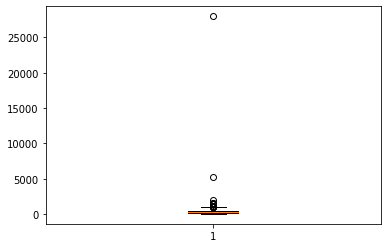

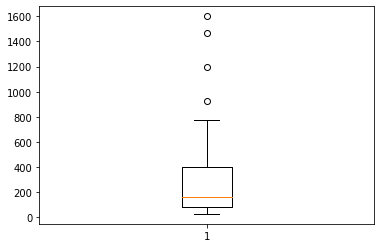

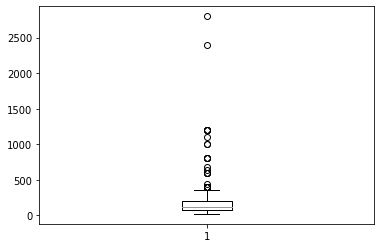

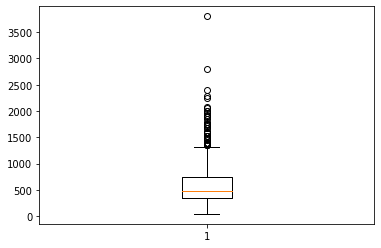

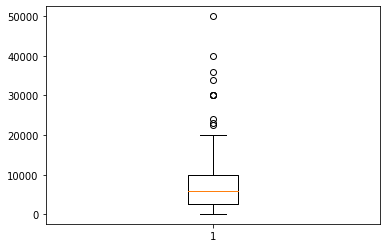

In [36]:
plt.boxplot(X_cat["DOUTL"].loc[X_cat["DOUTL"] != 0])
plt.show()

plt.boxplot(X_cat["DOUTHP"].loc[X_cat["DOUTHP"] != 0])
plt.show()

plt.boxplot(X_cat["DOUTCC"].loc[X_cat["DOUTCC"] != 0])
plt.show()

plt.boxplot(X_cat["DOUTM"].loc[X_cat["DOUTM"] != 0])
plt.show()

plt.boxplot(X_cat["SINC"].loc[X_cat["SINC"] != 0])
plt.show()

–ü—Ä–æ–±—É–µ–º –∏—Ö –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –∏ —É–±—Ä–∞—Ç—å –∏—Å–ø–æ–ª—å–∑—É—è z-score. –í–∏–¥–∏–º, —á—Ç–æ, –≤–æ-–ø–µ—Ä–≤—ã—Ö, –∞—É—Ç–ª–∞–µ—Ä—ã –Ω–µ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω—ã (–≤ —Å—Ä–µ–¥–Ω–µ–º –æ–∫–æ–ª–æ –ø—Ä–æ—Ü–µ–Ω—Ç–∞ –≤ –∫–∞–∂–¥–æ–º –∏–∑ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤), –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –Ω–∞—Å—Ç–æ–ª—å–∫–æ –≤–µ–ª–∏–∫–∏, —á—Ç–æ –≤ —Å—É–º–º–µ –≤–µ—Å—è—Ç –¥–æ –ø–æ–ª–æ–≤–∏–Ω—ã —Å—É–º–º—ã –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–æ–º –∏–∑ —Ñ–∞–∫—Ç–æ—Ä–æ–≤. –ü—Ä–∏ —ç—Ç–æ–º –≤—ã–±—Ä–∞—Å—ã–≤–∞—è –∏—Ö, –º—ã –ø–æ—á–µ–º—É-—Ç–æ –Ω–µ –ø–æ–ª—É—á–∞–µ–º —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö —É–ª—É—á—à–µ–Ω–∏–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö (–≤–º–µ—Å—Ç–æ —Å—Ç–∞—Ä–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã —Å –∞—É—Ç–ª–∞–µ—Ä–∞–º–∏ –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –Ω–æ–≤–∞—è, –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –¥–æ—Å—Ç–∏—á—å –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è). 

__Update AM:__ –ø–æ—Å—Ç—Ä–æ–∏–ª —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–µ–∑ –Ω—É–ª–µ–π, –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–ª –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é —Ñ–∞–∫—Ç–æ—Ä–æ–≤. –ù–µ –∫–∞—ç–µ—Ç—Å—è, —á—Ç–æ –≤ —Ç–∞–∫–æ–º –≤–∏–¥–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã —è–≤–ª—è—é—Ç—Å—è —Ç–∞–∫–∏–º–∏ —É–∂ –≤—ã–±—Ä–æ—Å–∞–º–∏. –ù–∞–≤–µ—Ä–Ω–æ–µ, DOUTL = $25000 ‚Äî –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –º–Ω–æ–≥–æ, –Ω–æ —Ç–∞–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –µ–¥–∏–Ω–∏—á–Ω–æ–µ, –º–± —ç—Ç–æ –ò–ü? –î—É–º–∞—é, –Ω–µ –≤—Å—ë —Ç–∞–∫ –ø–ª–æ—Ö–æ.üôÉ

In [42]:
X_cat

YOB NKID  DEP PHON    SINC             AES    DAINC  \
0     19.0  4.0   no  yes     0.0         retired       no   
1     41.0  2.0   no  yes     0.0  private sector  36000.0   
2     66.0   no   no  yes     0.0          others  30000.0   
3     51.0  2.0   no  yes     0.0  private sector    464.0   
4     65.0   no   no  yes     0.0  private sector  15000.0   
...    ...  ...  ...  ...     ...             ...      ...   
1220  52.0  4.0  yes  yes     0.0      Government  37764.0   
1221  56.0  3.0   no  yes  1200.0  private sector  31500.0   
1222  60.0   no   no  yes     0.0   self employed  46800.0   
1223  20.0   no   no  yes     0.0         retired       no   
1224  66.0   no   no  yes     0.0         student   5538.0   

                     RES    DHVAL    DMORT   DOUTM  DOUTL  DOUTHP  DOUTCC  
0                  Owner  14464.0      4.0     0.0    0.0     0.0     0.0  
1                  Owner       no       no   280.0  664.0     0.0    80.0  
2                  Other       no       no     0.0    0.0     0.0     0.0  
3                  Owner  24928.0   8464.0   584.0  320.0     0.0    60.0  
4           With parents       no       no     0.0    0.0     0.0     0.0  
...                  ...      ...      ...     ...    ...     ...     ...  
1220  Tenant Unfurnished       no       no     0.0  340.0     0.0     0.0  
1221               Owner   6928.0  46464.0   784.0  256.0     0.0     0.0  
1222               Owner  11392.0    928.0  1144.0  680.0     0.0   108.0  
1223               Other       no       no     0.0    0.0     0.0     0.0  
1224        With parents       no       no   492.0    0.0     0.0     0.0  

[1218 rows x 14 columns]

In [54]:
col = X_cat[column_with_outliers_name]
col = col[col != 0]
col

5       10500.0
6        6500.0
7       13500.0
11       8000.0
13      10000.0
         ...   
1203    11700.0
1216     1000.0
1217     8000.0
1219     2500.0
1221     1200.0
Name: SINC, Length: 316, dtype: float64

In [56]:
abs(stats.zscore(col))

5       0.418948
6       0.175241
7       0.864590
11      0.047580
13      0.344675
          ...   
1203    0.597205
1216    0.992250
1217    0.047580
1219    0.769429
1221    0.962540
Name: SINC, Length: 316, dtype: float64



Share of outliers in DOUTL (Outgoings on Loans) is 0.0008210180623973727
Mass of outliers in DOUTL (Outgoings on Loans) is 0.18746652383502946
numeric


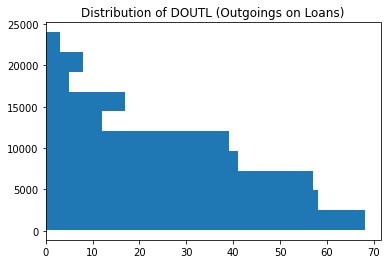

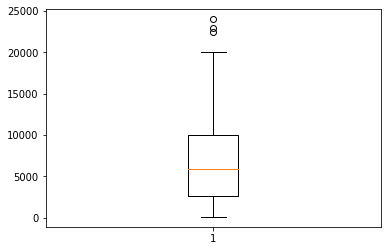



Share of outliers in DOUTM (Outgoings on mortgage or rent) is 0.011494252873563218
Mass of outliers in DOUTM (Outgoings on mortgage or rent) is 0.07463702141933011
numeric


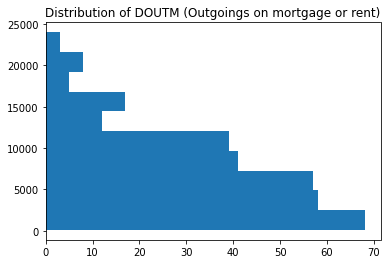

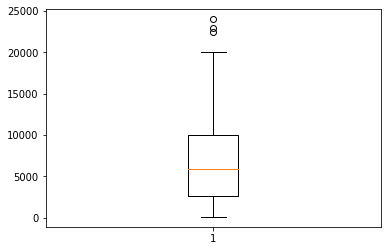



Share of outliers in DOUTCC (Outgoings on credit cards) is 0.0016420361247947454
Mass of outliers in DOUTCC (Outgoings on credit cards) is 0.11100674579455214
numeric


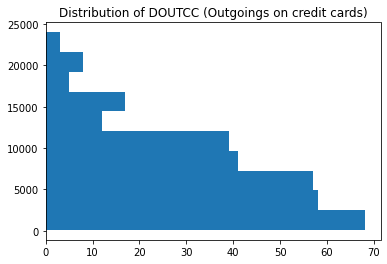

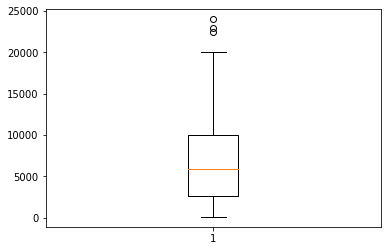



Share of outliers in DOUTHP (Outgoings on Hire Purchase) is 0.0024630541871921183
Mass of outliers in DOUTHP (Outgoings on Hire Purchase) is 0.12107776261937245
numeric


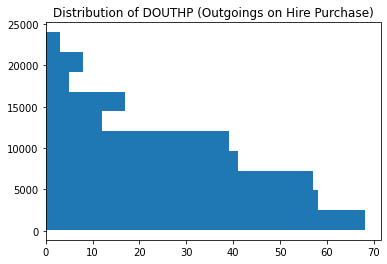

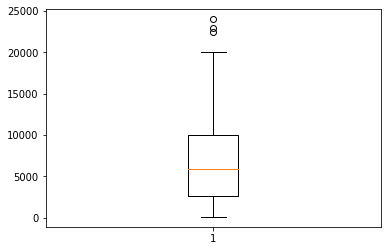



Share of outliers in SINC (Spouse's income) is 0.006568144499178982
Mass of outliers in SINC (Spouse's income) is 0.11537903661800968
numeric


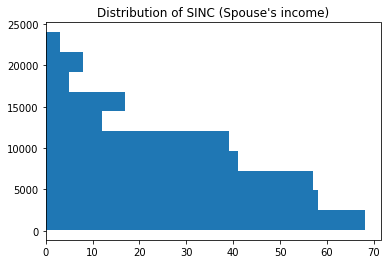

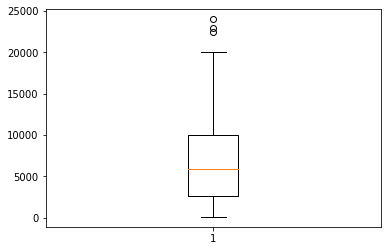

In [62]:
objects_with_outliers = ["DOUTL", "DOUTM", "DOUTCC", "DOUTHP", "SINC"]

for column_with_outliers_name in objects_with_outliers:
    # —Ñ–∏–ª—å—Ç—Ä—É–µ–º –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞–µ–Ω—á–∏
    col = X_cat[column_with_outliers_name]
    col = col[col != 0]
    
    # —Ñ–∏–ª—å—Ç—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã
    object_with_outliers = col[abs(stats.zscore(col)) >= 3]
    
    print(f"\n\nShare of outliers in {column_with_outliers_name} ({names_mask[column_with_outliers_name]}) is {len(object_with_outliers) / X_cat.shape[0]}")
    print(f"Mass of outliers in {column_with_outliers_name} ({names_mask[column_with_outliers_name]}) is {object_with_outliers.sum() / X_cat[column_with_outliers_name].sum()}")
    
    plot_all(object_without_outliers, column_with_outliers_name, names_mask)
    
    plt.boxplot(object_without_outliers)
    plt.show()

### –í—ã–≤–æ–¥—ã

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–≤—Å–µ–º –Ω–µ–±–æ–ª—å—à–æ–π, –∫–∞–∫ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —á–∏—Å–ª–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, —Ç–∞–∫ –∏ —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—è —Ñ–∞–∫—Ç–æ—Ä–æ–≤. –ù–µ—Å–∫–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã. –ù–µ–º–Ω–æ–≥–æ —Å—Ç—Ä–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–æ–¥–æ–≤ —Ä–æ–∂–¥–µ–Ω–∏—è –∑–∞–µ–º—â–∏–∫–æ–≤. –†–µ—à–µ–Ω–∏–µ –∑–∞–º–µ–Ω–∏—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ –≥–æ–¥–æ–º "99" –∫–∞–∂–µ—Ç—Å—è –Ω–µ –æ—á–µ–Ω—å –≤–µ—Ä–Ω—ã–º, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –º–æ–¥–µ–ª–∏ –∑–∞ —ç—Ç–∏–º –ø—Ä–∏–¥–µ—Ç—Å—è —Ç—â–∞—Ç–µ–ª—å–Ω–æ —Å–ª–µ–¥–∏—Ç—å, –∫ —Ç–æ–º—É –∂–µ —Å–µ–≥–æ–¥–Ω—è –ª—é–¥–∏ 99-–≥–æ –≥–æ–¥–∞ —Ä–æ–∂–¥–µ–Ω–∏—è —É–∂–µ –º–æ–≥—É—Ç –ø–æ–¥–∞–≤–∞—Ç—å –∑–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç. 

__Update –ê–ú:__ —Ä–∞—Å—Ü–µ–Ω–∏–≤–∞—é –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ –∫–∞–∫ –∞—É—Ç–ª–∞–π–µ—Ä—ã –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é. –ï—Å–ª–∏ –¥–µ–ª–∞—Ç—å z-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ –æ—Å—Ç–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º, –ø–æ–ª—É—á–∞–µ—Ç—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ –∞—É—Ç–ª–∞–π–µ—Ä–æ–≤.